# 실습 : fashion MNIST 를 이용하여 위와 동일한 작업

Label	Class

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7)

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation

np.random.seed(102)

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

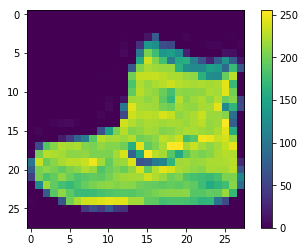

In [4]:
plt.imshow(train_images[0])
plt.colorbar()

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

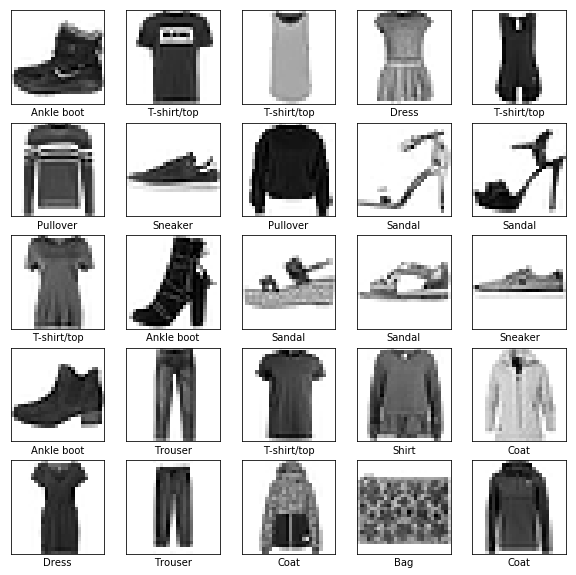

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

In [7]:
train_images = train_images.reshape(-1, 784).astype("float32")
test_images = test_images.reshape(-1, 784).astype("float32")

In [8]:
X_train = train_images / 255.
X_test = test_images  /255.

In [9]:
X_train.shape

(60000, 784)

In [10]:
y_train_onehot = tf.keras.utils.to_categorical(train_labels)
y_test_onehot  = tf.keras.utils.to_categorical(test_labels)

In [11]:
y_train_onehot.shape

(60000, 10)

In [12]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train_onehot)).shuffle(10000).batch(128)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test, y_test_onehot)).batch(128)

In [13]:
model = tf.keras.Sequential()
model.add(Dense(256, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [14]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [15]:
history = model.fit(train_ds, epochs=40, verbose=1, validation_data=test_ds)

Epoch 1/40
469/469 [==============================] - 5s 10ms/step - loss: 0.9118 - accuracy: 0.6546 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/40
469/469 [==============================] - 3s 6ms/step - loss: 0.5547 - accuracy: 0.7966 - val_loss: 0.5083 - val_accuracy: 0.8128
Epoch 3/40
469/469 [==============================] - 3s 6ms/step - loss: 0.4778 - accuracy: 0.8252 - val_loss: 0.4631 - val_accuracy: 0.8293
Epoch 4/40
469/469 [==============================] - 3s 7ms/step - loss: 0.4354 - accuracy: 0.8409 - val_loss: 0.4314 - val_accuracy: 0.8409
Epoch 5/40
469/469 [==============================] - 3s 6ms/step - loss: 0.4097 - accuracy: 0.8507 - val_loss: 0.4105 - val_accuracy: 0.8500
Epoch 6/40
469/469 [==============================] - 3s 6ms/step - loss: 0.3896 - accuracy: 0.8578 - val_loss: 0.4093 - val_accuracy: 0.8477
Epoch 7/40
469/469 [==============================] - 3s 6ms/step - loss: 0.3768 - accuracy: 0.8638 - val_loss: 0.3974 - val_accuracy: 0.85

In [17]:
score = model.evaluate(test_ds, verbose=0)

In [22]:
print(model.metrics_names)
print("Test score : %.2f" % score[0])          # evaluation of loss function
print("Test accuracy : %.2f" % score[1])

['loss', 'accuracy']
Test score : 0.31
Test accuracy : 0.89


In [29]:
y_predict = model.predict_classes(X_test)
y_true_classes = np.argmax(y_test_onehot, axis=1)

In [30]:
correct_indices = np.nonzero(y_predict == y_true_classes)[0]
incorrect_indices = np.nonzero(y_predict != y_true_classes)[0]
print(correct_indices.shape)
print(incorrect_indices.shape)

(8906,)
(1094,)


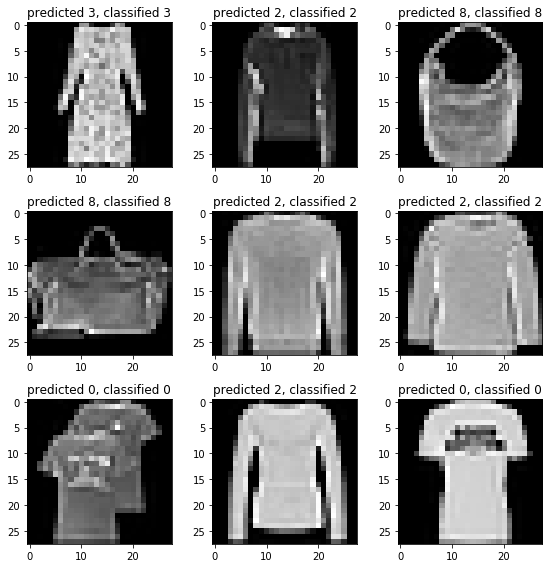

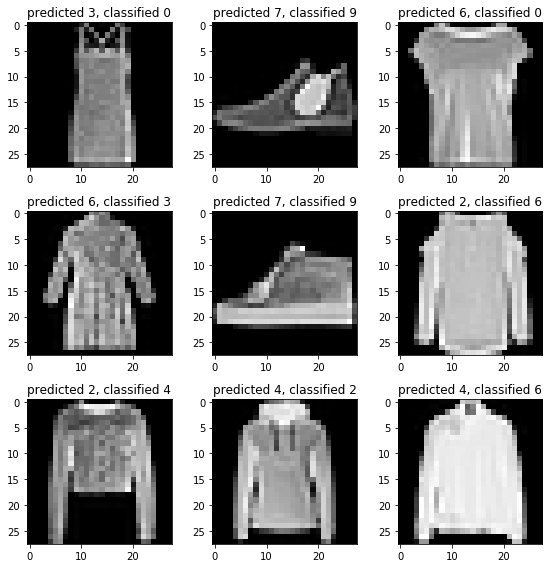

In [31]:
plt.figure(figsize=(8, 8))
for i, correct in enumerate(np.random.choice(correct_indices, 9)):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[correct].reshape(28, 28), cmap='gray')
    plt.title("predicted {}, classified {}".format(y_predict[correct], y_true_classes[correct]))
    plt.tight_layout()
    
plt.figure(figsize=(8, 8))
for i, incorrect in enumerate(np.random.choice(incorrect_indices, 9)):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray')
    plt.title("predicted {}, classified {}".format(y_predict[incorrect], y_true_classes[incorrect]))
    plt.tight_layout()

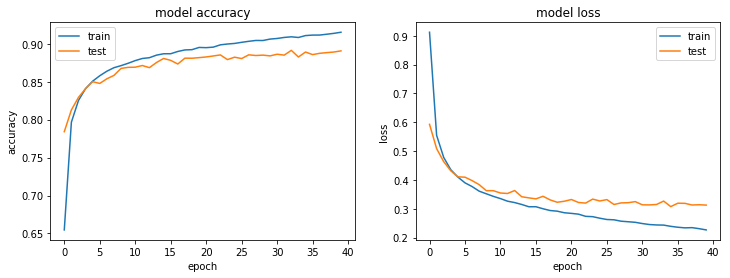

In [32]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test']);